In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os 

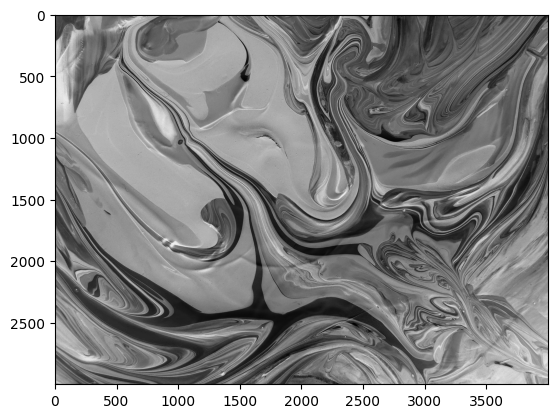

In [11]:
# Read image
img = cv2.imread('output/abstract.jpg', cv2.IMREAD_GRAYSCALE)

# Plot image
plt.imshow(img, cmap='gray')

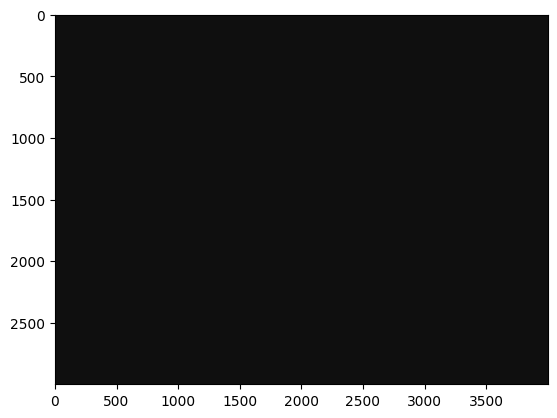

In [12]:
img_norm = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

img_f32 = np.float32(img_norm) / 255.0

img_dct = cv2.dct(img_f32)

plt.imshow(img_dct, cmap='gray')

In [13]:
img_dct

array([[ 1.6211338e+03,  1.1223660e+02,  7.3734306e+01, ...,
        -2.0665918e-03,  5.5370308e-03,  1.8015215e-02],
       [ 3.1079060e+01,  2.1505869e+02, -1.0399507e+02, ...,
        -1.4433831e-02, -1.8872680e-02,  1.8828675e-02],
       [-4.2748665e+01, -8.0899902e+01,  5.6807789e+01, ...,
        -1.8100491e-02,  2.5692577e-03, -8.2993442e-03],
       ...,
       [ 3.0576438e-03, -1.4597550e-02,  2.0585943e-02, ...,
         5.6799259e-03, -9.8509397e-03, -1.0343809e-02],
       [ 1.5610263e-02,  3.0898832e-02, -2.8089963e-02, ...,
        -2.4084360e-03,  7.4584116e-03, -9.5658544e-03],
       [ 2.7275652e-02, -3.4588620e-02, -1.6672164e-04, ...,
        -6.1646635e-03, -8.2780086e-03, -8.5036841e-04]], dtype=float32)

In [14]:
img_dct_int_flat = img_dct.flatten()

img_dct_int_flat

array([ 1.6211338e+03,  1.1223660e+02,  7.3734306e+01, ...,
       -6.1646635e-03, -8.2780086e-03, -8.5036841e-04], dtype=float32)

In [15]:
freqs = [ 0 for i in range(10) ]

for i in range(len(img_dct_int_flat)):
    # Get first digit 
    if img_dct_int_flat[i] > 0:
        digit = int(str(img_dct_int_flat[i])[0])
        freqs[digit] += 1

freqs = freqs[1:10]

freqs

[8588, 3863, 3061, 2787, 2640, 2683, 2638, 2629, 2466]

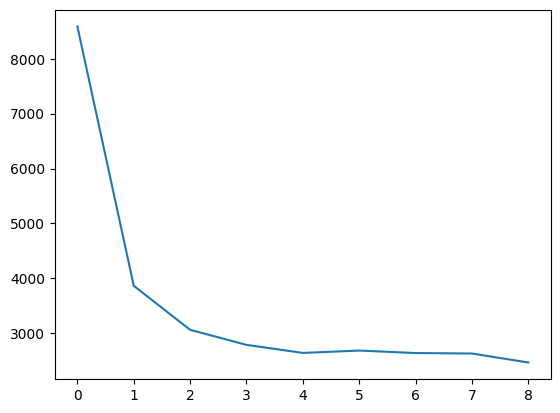

In [16]:
plt.plot(freqs)

In [17]:
probs = [ freqs[i] / sum(freqs) for i in range(9) ]
benford = [ np.log10(1 + 1 / i) for i in range(1, 10) ]

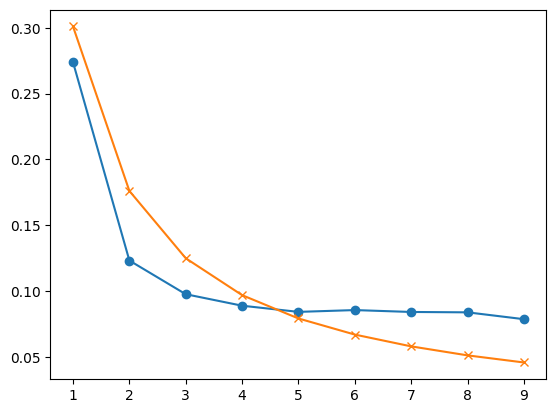

In [18]:
plt.plot(range(1,10), probs, label='Probs', marker='o')
plt.plot(range(1,10), benford, label='Benford', marker='x')

In [43]:
def benford_analysis(img, scl=0.5):
    # Scale down image
    h,w = img.shape
    nh, nw = int(h * scl), int(w * scl)

    if nh%2 != 0:
        nh += 1
    if nw%2 != 0:
        nw += 1

    img = cv2.resize(img, (nw, nh))
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_f32  = np.float32(img_norm) / 255.0
    img_dct  = cv2.dct(img_f32) 

    img_flat = img_dct.flatten()

    img_flat = img_flat * 1000000000000
    
    freqs = [ 0 for i in range(10) ]

    for i in range(len(img_flat)):
        # Get first digit 
        if img_flat[i] > 0:
            digit = int(str(img_flat[i])[0])
            freqs[digit] += 1

    freqs = freqs[1:10]

    probs = [ freqs[i] / sum(freqs) for i in range(9) ]

    return probs

In [63]:
def benford_dft_analysis(img, scl=0.5):
    # Scale down image
    h,w = img.shape
    nh, nw = int(h * scl), int(w * scl)

    if nh%2 != 0:
        nh += 1
    if nw%2 != 0:
        nw += 1

    img = cv2.resize(img, (nw, nh))
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    img_f32  = np.float32(img_norm) / 255.0
    img_dct  = cv2.dft(img_f32) 

    img_flat = img_dct.flatten()

    img_flat = img_flat * 1000000000000
    
    freqs = [ 0 for i in range(10) ]

    for i in range(len(img_flat)):
        # Get first digit 
        if img_flat[i] > 0:
            digit = int(str(img_flat[i])[0])
            freqs[digit] += 1

    freqs = freqs[1:10]

    probs = [ freqs[i] / sum(freqs) for i in range(9) ]

    return probs

In [58]:
def plot_benford_analysis(dir, scl=0.5, alpha=0.05, plot_individual=False, plot_avg=True, plot_envelope=True, plot_benford=True):
    # Get jpeg and jpg files
    files = [ f for f in os.listdir(dir) if f.endswith('.jpg') or f.endswith('.jpeg') ]

    # Get probs for each image
    probs = [ benford_analysis(cv2.imread(dir + '/' + f, cv2.IMREAD_GRAYSCALE), scl) for f in files ]

    # Get average probs
    avg_probs = [ sum([ probs[i][j] for i in range(len(probs)) ]) / len(probs) for j in range(9) ]

    # Get probs envelope
    probs_max = [ max([ probs[i][j] for i in range(len(probs)) ]) for j in range(9) ]
    probs_min = [ min([ probs[i][j] for i in range(len(probs)) ]) for j in range(9) ]

    # Plot probs
    if plot_individual:
        for i in range(len(probs)):
            plt.plot(range(1,10), probs[i], label=files[i], color='blue', alpha=alpha)

    if plot_avg:
        plt.plot(range(1,10), avg_probs, label='Average', color='red')

    if plot_envelope:
        plt.plot(range(1,10), probs_max, label='Max', color='blue')
        plt.plot(range(1,10), probs_min, label='Min', color='green')

        # Box plot
        plt.fill_between(range(1,10), probs_max, probs_min, color='blue', alpha=0.2)

    if plot_benford:
        benford = [ np.log10(1 + 1 / i) for i in range(1, 10) ]
        plt.plot(range(1,10), benford, label='Benford', color='black')

    plt.plot(range(1,10), benford, label='Benford', color='orange')
    plt.show()

In [64]:
def plot_benford_dft_analysis(dir, scl=0.5, alpha=0.05, plot_individual=False, plot_avg=True, plot_envelope=True, plot_benford=True):
    # Get jpeg and jpg files
    files = [ f for f in os.listdir(dir) if f.endswith('.jpg') or f.endswith('.jpeg') ]

    # Get probs for each image
    probs = [ benford_dft_analysis(cv2.imread(dir + '/' + f, cv2.IMREAD_GRAYSCALE), scl) for f in files ]

    # Get average probs
    avg_probs = [ sum([ probs[i][j] for i in range(len(probs)) ]) / len(probs) for j in range(9) ]

    # Get probs envelope
    probs_max = [ max([ probs[i][j] for i in range(len(probs)) ]) for j in range(9) ]
    probs_min = [ min([ probs[i][j] for i in range(len(probs)) ]) for j in range(9) ]

    # Plot probs
    if plot_individual:
        for i in range(len(probs)):
            plt.plot(range(1,10), probs[i], label=files[i], color='blue', alpha=alpha)

    if plot_avg:
        plt.plot(range(1,10), avg_probs, label='Average', color='red')

    if plot_envelope:
        plt.plot(range(1,10), probs_max, label='Max', color='blue')
        plt.plot(range(1,10), probs_min, label='Min', color='green')

        # Box plot
        plt.fill_between(range(1,10), probs_max, probs_min, color='blue', alpha=0.2)

    if plot_benford:
        benford = [ np.log10(1 + 1 / i) for i in range(1, 10) ]
        plt.plot(range(1,10), benford, label='Benford', color='black')

    plt.plot(range(1,10), benford, label='Benford', color='orange')
    plt.show()

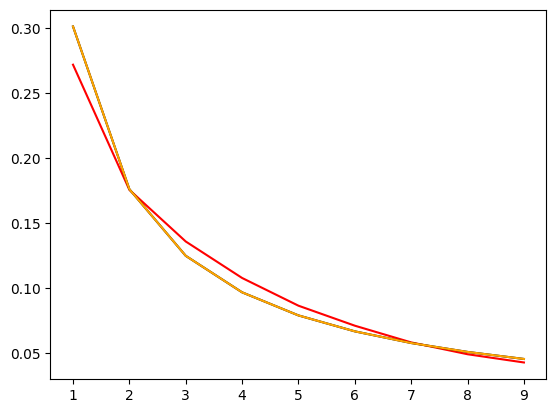

In [61]:
plot_benford_analysis('gaugan', scl=0.25, alpha=0.05, plot_individual=False, plot_avg=True, plot_envelope=False, plot_benford=True)

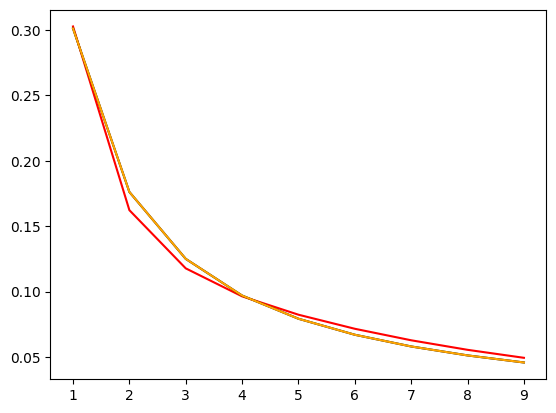

In [62]:
plot_benford_analysis('data', scl=0.25, alpha=0.05, plot_individual=False, plot_avg=True, plot_envelope=False, plot_benford=True)

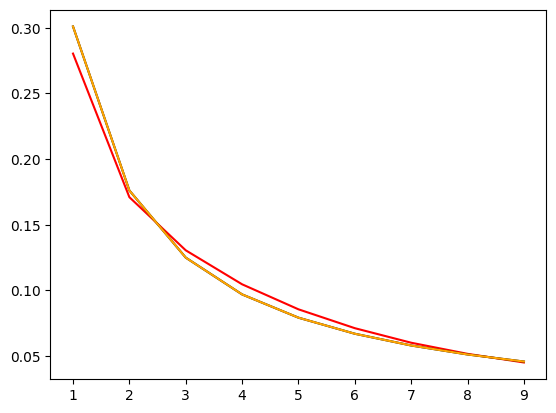

In [66]:
plot_benford_dft_analysis('data', scl=0.25, alpha=0.05, plot_individual=False, plot_avg=True, plot_envelope=False, plot_benford=True)